<a href="https://colab.research.google.com/github/Sand08/Statistics-and-Machine-Learning/blob/main/Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import gspread
import pandas as pd
from google.auth import default
from google.colab import auth
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
spreadsheet = gc.open_by_key('1SeUKR4UGQw7xEvuiTwSY-gD4UNBg56lLklIF1ZsTyIk')
worksheet = spreadsheet.get_worksheet(0)
df = pd.DataFrame(worksheet.get())
# Code for making the first row as header. Remove if not needed.
df.columns = df.iloc[0]
df = df.drop(0)
df.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1,Female,21,1.62,64,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
2,Female,21,1.52,56,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
3,Male,23,1.8,77,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
4,Male,27,1.8,87,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
5,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


**Imputation** - KNN

In [26]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder


# Replace empty strings with NaN
df.replace('', np.nan, inplace=True)

# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Impute numerical columns using KNN
knn_imputer = KNNImputer(n_neighbors=5)
df[numerical_columns] = knn_imputer.fit_transform(df[numerical_columns])

# Encode and impute categorical columns using mode
for col in categorical_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Check for remaining missing values
missing_summary_after = df.isnull().sum()
print("Remaining Missing Values:\n", missing_summary_after)

# Save the cleaned dataset
df.to_csv("Cleaned_Dataset_All_Columns_Imputed.csv", index=False)

# For Google Colab: Direct file download
from google.colab import files
files.download("Cleaned_Dataset_All_Columns_Imputed.csv")


# Check for remaining missing values
missing_summary_after = df.isnull().sum()

missing_summary, missing_summary_after

Remaining Missing Values:
 0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


<ipython-input-26-56b9e9990143>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(0
 Gender                             0
 Age                               72
 Height                             0
 Weight                             0
 family_history_with_overweight    31
 FAVC                              15
 FCVC                              26
 NCP                               29
 CAEC                              69
 SMOKE                             33
 CH2O                              24
 SCC                               33
 FAF                               45
 TUE                               39
 CALC                              27
 MTRANS                             1
 NObeyesdad                         0
 dtype: int64,
 0
 Gender                            0
 Age                               0
 Height                            0
 Weight                            0
 family_history_with_overweight    0
 FAVC                              0
 FCVC                              0
 NCP                               0
 CAEC                              0


**Scaling Data**

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Reload the dataset if needed (already imputed)
file_path = 'Cleaned_Dataset_All_Columns_Imputed.csv'
df = pd.read_csv(file_path)

# Separate numerical columns for scaling
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Standardization (Z-score scaling)
standard_scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_columns] = standard_scaler.fit_transform(df[numerical_columns])

# Display the first few rows of the standardized dataset
print("Standardized Dataset (Z-score):")
print(df_standardized.head())

# Normalization (Min-Max scaling)
minmax_scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_columns] = minmax_scaler.fit_transform(df[numerical_columns])

# Display the first few rows of the normalized dataset
print("\nNormalized Dataset (Min-Max Scaling):")
print(df_normalized.head())


Standardized Dataset (Z-score):
   Gender       Age    Height    Weight family_history_with_overweight FAVC  \
0  Female -0.505502 -0.882443 -0.862002                            yes   no   
1  Female -0.505502 -1.961638 -1.169811                            yes   no   
2    Male -0.183313  1.060109 -0.361812                            yes   no   
3    Male  0.461065  1.060109  0.022949                             no   no   
4    Male -0.344408  0.844270  0.130682                             no   no   

       FCVC       NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0 -0.794515  0.406197  Sometimes    no -0.013986   no -1.156518  0.585555   
1  1.076812  0.406197  Sometimes   yes  1.630134  yes  2.344509 -1.055471   
2 -0.794515  0.406197  Sometimes    no -0.013986   no  1.177500  0.585555   
3  1.076812  0.406197  Sometimes    no -0.013986   no  1.177500 -1.055471   
4 -0.794515 -2.177925  Sometimes    no -0.013986   no -1.156518 -1.055471   

         CALC                 

**Injecting and Smoothing Noise**

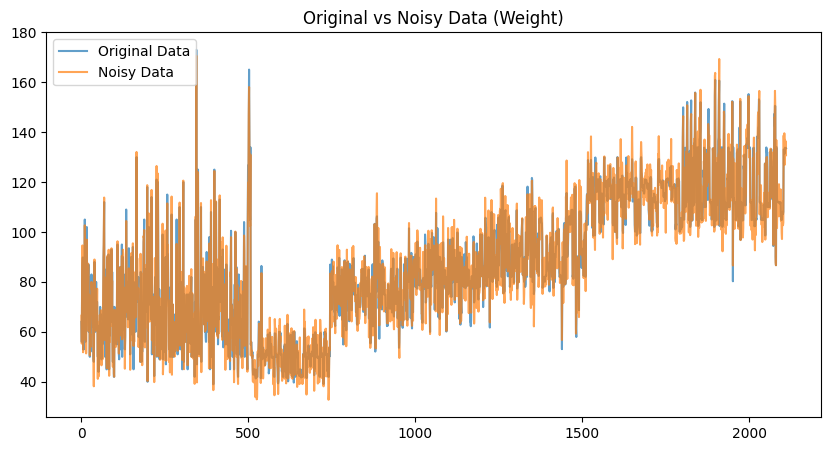

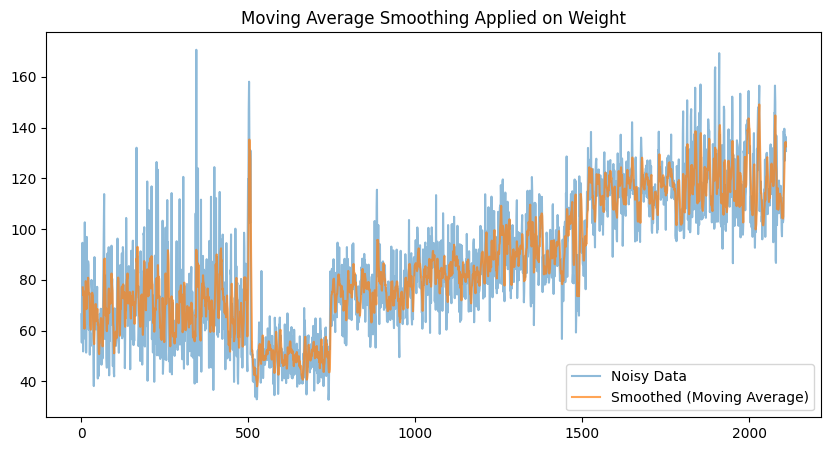


Noisy and Smoothed Data:
      Weight  Weight_MA
0  66.483571        NaN
1  55.308678        NaN
2  80.238443        NaN
3  94.615149        NaN
4  88.629233  77.055015


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reload the dataset
file_path = 'Cleaned_Dataset_All_Columns_Imputed.csv'
df = pd.read_csv(file_path)

# Select a numerical feature to inject noise (e.g., 'Weight')
feature = 'Weight'

# Inject random Gaussian noise into the feature
np.random.seed(42)
noise = np.random.normal(0, 5, size=len(df[feature]))  # Mean = 0, Std Dev = 5
df_noisy = df.copy()
df_noisy[feature] = df[feature] + noise

# Plot original vs. noisy data
plt.figure(figsize=(10, 5))
plt.plot(df[feature].values, label="Original Data", alpha=0.7)
plt.plot(df_noisy[feature].values, label="Noisy Data", alpha=0.7)
plt.title(f"Original vs Noisy Data ({feature})")
plt.legend()
plt.show()

# Apply Moving Average Smoothing
window_size = 5  # Adjust window size as needed
df_noisy['Weight_MA'] = df_noisy[feature].rolling(window=window_size).mean()

# Plot smoothed data
plt.figure(figsize=(10, 5))
plt.plot(df_noisy[feature].values, label="Noisy Data", alpha=0.5)
plt.plot(df_noisy['Weight_MA'].values, label="Smoothed (Moving Average)", alpha=0.7)
plt.title(f"Moving Average Smoothing Applied on {feature}")
plt.legend()
plt.show()

# Display the first few rows of the noisy and smoothed data
print("\nNoisy and Smoothed Data:")
print(df_noisy[[feature, 'Weight_MA']].head())


**Handling Outliers**

In [30]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

# Load the dataset
file_path = 'Cleaned_Dataset_All_Columns_Imputed.csv'
df = pd.read_csv(file_path)

# Select numerical columns for outlier detection
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Detect outliers using Z-score
z_scores = np.abs(zscore(df[numerical_columns]))
outliers = (z_scores > 3)  # Threshold = 3 standard deviations

# Print outlier summary
outlier_summary = pd.DataFrame({
    "Feature": numerical_columns,
    "Outliers_Count": np.sum(outliers, axis=0)
})
print("Outlier Summary:\n", outlier_summary)

# Option 1: Remove outliers
df_no_outliers = df[(z_scores < 3).all(axis=1)]

# Option 2: Cap outliers (Winsorization)
df_capped = df.copy()
for col in numerical_columns:
    lower_bound = df[col].quantile(0.01)  # 1st percentile
    upper_bound = df[col].quantile(0.99)  # 99th percentile
    df_capped[col] = np.clip(df[col], lower_bound, upper_bound)

# Display results
print("\nOriginal Dataset Shape:", df.shape)
print("Dataset Shape After Removing Outliers:", df_no_outliers.shape)
print("Dataset After Capping Outliers:")
print(df_capped[numerical_columns].head())

# Save results for further analysis (optional)
df_no_outliers.to_csv("Dataset_No_Outliers.csv", index=False)
df_capped.to_csv("Dataset_Capped_Outliers.csv", index=False)


Outlier Summary:
        Feature  Outliers_Count
Age        Age              22
Height  Height               1
Weight  Weight               2
FCVC      FCVC               0
NCP        NCP               0
CH2O      CH2O               0
FAF        FAF               0
TUE        TUE               0

Original Dataset Shape: (2111, 17)
Dataset Shape After Removing Outliers: (2086, 17)
Dataset After Capping Outliers:
    Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE
0  21.0    1.62    64.0   2.0  3.0   2.0  0.0  1.0
1  21.0    1.52    56.0   3.0  3.0   3.0  3.0  0.0
2  23.0    1.80    77.0   2.0  3.0   2.0  2.0  1.0
3  27.0    1.80    87.0   3.0  3.0   2.0  2.0  0.0
4  22.0    1.78    89.8   2.0  1.0   2.0  0.0  0.0


**Feature Selection**

**1. Filter Method**

Features Selected Based on Correlation:
 ['Age', 'Weight', 'CH2O', 'FAF', 'family_history_with_overweight_yes', 'CAEC_Frequently', 'CAEC_Sometimes', 'CALC_Sometimes', 'CALC_no']


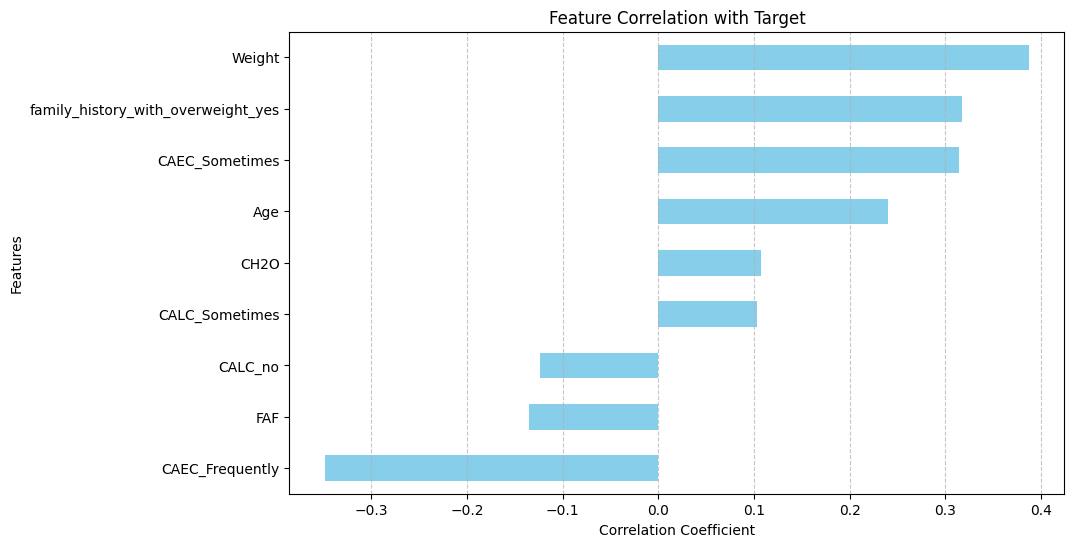

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt



# Encode the target variable to numeric
label_encoder = LabelEncoder()
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

# Convert all categorical features in X to numeric using one-hot encoding
X = pd.get_dummies(df.drop(columns=['NObeyesdad']), drop_first=True)
y = df['NObeyesdad']

# Compute correlation matrix
correlation_matrix = X.corrwith(y, method='pearson')

# Set a threshold to filter significant correlations
threshold = 0.1
selected_features_correlation = correlation_matrix[correlation_matrix.abs() > threshold].index.tolist()

# Display selected features
print("Features Selected Based on Correlation:\n", selected_features_correlation)

# Plot correlation values for all features
plt.figure(figsize=(10, 6))
correlation_matrix[selected_features_correlation].sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Correlation with Target")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


**1.2 Mutual Information**

Mutual Information Scores:
                                Feature  Mutual_Information
2                               Weight            1.216589
0                                  Age            0.554804
1                               Height            0.422228
3                                 FCVC            0.373849
6                                  FAF            0.292089
7                                  TUE            0.269678
5                                 CH2O            0.266970
4                                  NCP            0.251071
8                          Gender_Male            0.215797
9   family_history_with_overweight_yes            0.133956
12                      CAEC_Sometimes            0.120788
11                     CAEC_Frequently            0.115222
17                      CALC_Sometimes            0.101810
18                             CALC_no            0.073589
10                            FAVC_yes            0.041038
20                    MTRANS

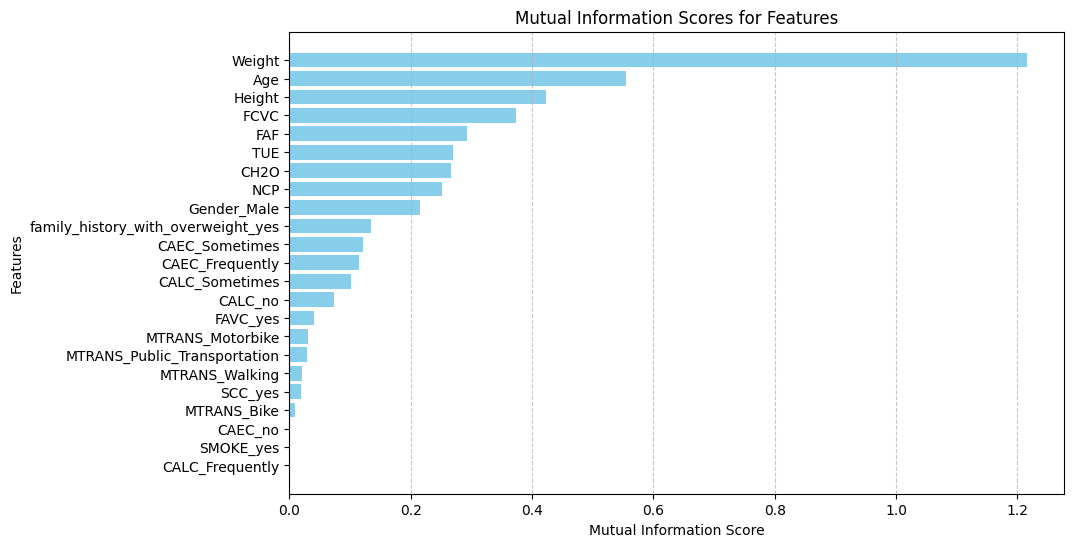

In [38]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt

# Compute mutual information scores
mi_scores = mutual_info_classif(X, y, random_state=42)

# Create a DataFrame to display results
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Information': mi_scores})
mi_scores_df.sort_values(by='Mutual_Information', ascending=False, inplace=True)

# Display features sorted by mutual information
print("Mutual Information Scores:\n", mi_scores_df)

# Select features with high mutual information
selected_features_mi = mi_scores_df[mi_scores_df['Mutual_Information'] > 0.05]['Feature'].tolist()
print("\nFeatures Selected Based on Mutual Information:\n", selected_features_mi)

# Plot Mutual Information scores
plt.figure(figsize=(10, 6))
plt.barh(mi_scores_df['Feature'], mi_scores_df['Mutual_Information'], color='skyblue')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.title('Mutual Information Scores for Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


**2. Wrapper Methods**

2.1 Recursive Feature Elimination (RFE)

Features Selected by RFE:
 ['Age', 'Height', 'Weight', 'FCVC', 'FAF']


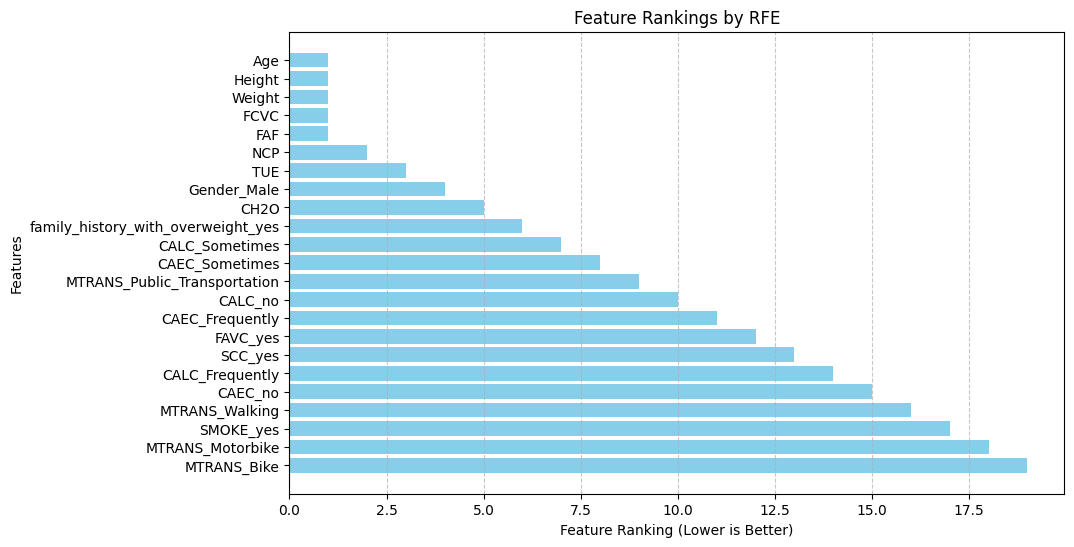

In [40]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Define a model for RFE
model = RandomForestClassifier(random_state=42)

# Apply RFE
rfe = RFE(estimator=model, n_features_to_select=5)  # Adjust the number of features to select
rfe.fit(X, y)

# Get selected features
selected_features_rfe = X.columns[rfe.support_].tolist()
print("Features Selected by RFE:\n", selected_features_rfe)

# Get feature rankings
rfe_rankings = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_})
rfe_rankings.sort_values(by='Ranking', inplace=True)

# Plot feature rankings
plt.figure(figsize=(10, 6))
plt.barh(rfe_rankings['Feature'], rfe_rankings['Ranking'], color='skyblue')
plt.xlabel('Feature Ranking (Lower is Better)')
plt.ylabel('Features')
plt.title('Feature Rankings by RFE')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


**3. Embedded Methods**

Features Selected by LASSO:
 ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'family_history_with_overweight_yes', 'FAVC_yes', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes', 'CALC_Frequently', 'CALC_no', 'MTRANS_Bike', 'MTRANS_Public_Transportation']


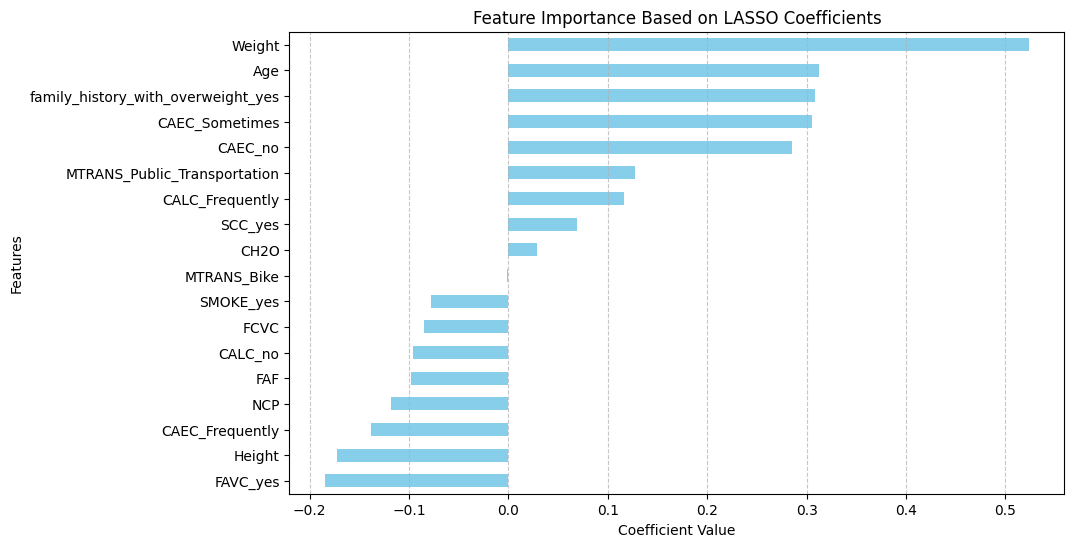

In [49]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply LASSO
lasso = Lasso(alpha=0.01, random_state=42)  # Adjust alpha as needed
lasso.fit(X_scaled, y)

# Get selected features and their coefficients
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)
selected_features_lasso = lasso_coefficients[lasso_coefficients != 0].index.tolist()
print("Features Selected by LASSO:\n", selected_features_lasso)

# Plot feature importance
plt.figure(figsize=(10, 6))
lasso_coefficients[lasso_coefficients != 0].sort_values().plot(kind='barh', color='skyblue')
plt.title("Feature Importance Based on LASSO Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
